**AI POWERED AGRICULTURAL MONITORING**


This model predicts which crop should a farmer yield based on the content of soil , humidity in that area , temperature , annual rainfall.

In [ ]:
#importing different librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing dataset
df=pd.read_csv("/content/indiancrop_dataset.csv")
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


In [ ]:
df.describe()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,2689.228182
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,3710.361267
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,950.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,1825.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,3500.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,120000.000000


In [ ]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

To find correlation between features in the given dataset.

In [ ]:
df.corr()


<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
N_SOIL,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.001302
P_SOIL,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.023683
K_SOIL,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.021923
TEMPERATURE,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.029044
HUMIDITY,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.041414
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.033548
RAINFALL,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.058847
CROP_PRICE,-0.001302,-0.023683,-0.021923,-0.029044,-0.041414,-0.033548,0.058847,1.000000


<ipython-input-9-a72216714ba9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="crest")


<Axes: >

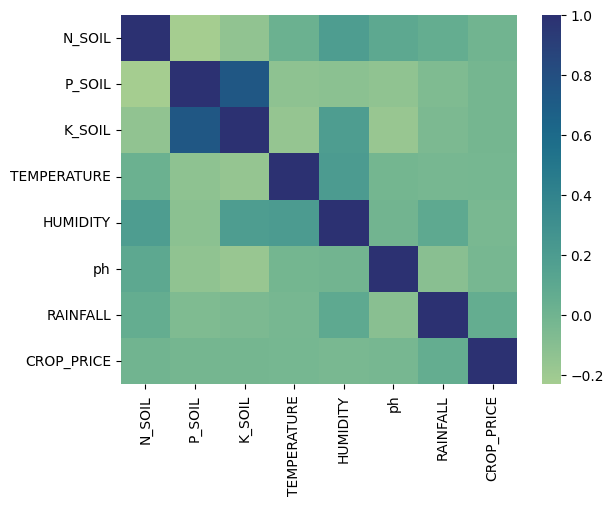

In [ ]:
sns.heatmap(df.corr(),cmap="crest")

In [ ]:
df.CROP.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [ ]:
df.STATE.unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Assam', 'Chattisgarh',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Nagaland', 'Odisha',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

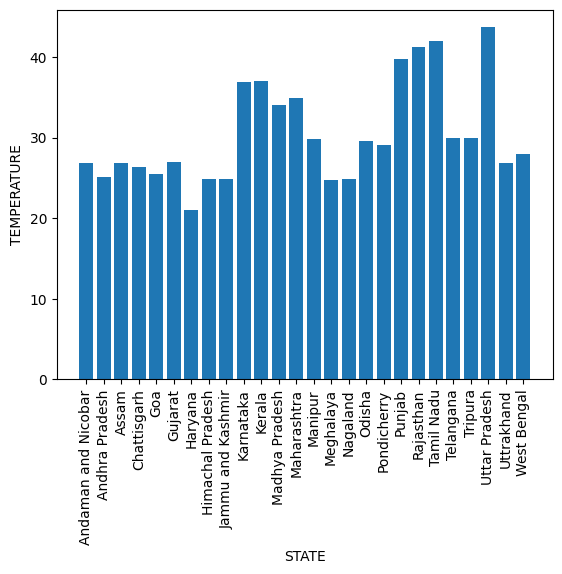

In [ ]:
plt.bar(df['STATE'],df['TEMPERATURE'])
plt.xlabel('STATE')
plt.ylabel('TEMPERATURE')
plt.xticks(rotation='vertical')
plt.show()

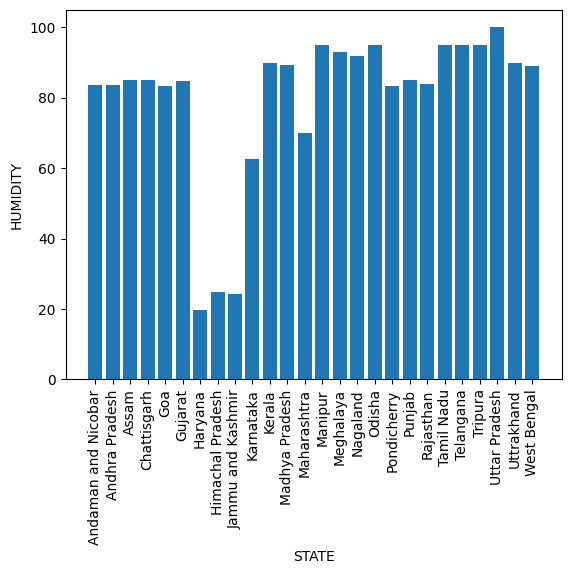

In [ ]:
plt.bar(df['STATE'],df['HUMIDITY'])
plt.xlabel('STATE')
plt.ylabel('HUMIDITY')
plt.xticks(rotation='vertical')
plt.show()


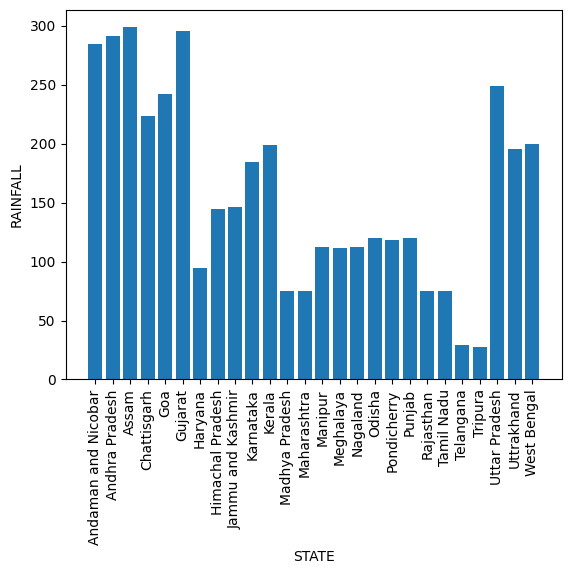

In [ ]:
plt.bar(df['STATE'],df['RAINFALL'])
plt.xlabel('STATE')
plt.ylabel('RAINFALL')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.drop(['STATE'],axis=1,inplace=True)

In [ ]:
df.skew()

<ipython-input-23-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


N_SOIL          0.509721
P_SOIL          1.010773
K_SOIL          2.375167
TEMPERATURE     0.184933
HUMIDITY       -1.091708
ph              0.283929
RAINFALL        0.965756
CROP_PRICE     15.926745
dtype: float64

In [ ]:
df.P_SOIL=np.log(df['P_SOIL'])

In [ ]:
df.K_SOIL=np.log(df['K_SOIL'])

In [ ]:
iq1=df['CROP_PRICE'].quantile(0.25)
iq2=df['CROP_PRICE'].quantile(0.75)
iq1


950.0

In [ ]:
iq2

3500.0

In [ ]:
df['CROP_PRICE']=np.where(df['CROP_PRICE']<iq1,iq1,df['CROP_PRICE'])
df['CROP_PRICE']=np.where(df['CROP_PRICE']>iq2,iq2,df['CROP_PRICE'])

In [ ]:
df.skew()

<ipython-input-29-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


N_SOIL         0.509721
P_SOIL        -0.782108
K_SOIL         0.804010
TEMPERATURE    0.184933
HUMIDITY      -1.091708
ph             0.283929
RAINFALL       0.965756
CROP_PRICE     0.283069
dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CROP']=le.fit_transform(df['CROP'])

In [ ]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
0,90,3.737670,3.761200,20.879744,82.002744,6.502985,202.935536,3500.0
1,85,4.060443,3.713572,21.770462,80.319644,7.038096,226.655537,3500.0
2,60,4.007333,3.784190,23.004459,82.320763,7.840207,263.964248,3500.0
3,74,3.555348,3.688879,26.491096,80.158363,6.980401,242.864034,3500.0
4,78,3.737670,3.737670,20.130175,81.604873,7.628473,262.717340,3500.0


In [ ]:
y.unique()


array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [ ]:
print("Training data",x_train.shape)

Training data (1540, 8)


In [ ]:
print("Testing data",x_test.shape)

Testing data (660, 8)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_prediction=model.predict(x_test)

**This model gave me the accuracy of 99.54%**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.9954545454545455